In [14]:
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np


data_dict = pickle.load(open('./datasetfinal.pickle', 'rb'))

data= np.array(data_dict['data'])
# Convert labels to a NumPy array
labels = np.array(data_dict['labels'])

data = np.asarray(data)
labels = np.asarray(labels)

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

model = RandomForestClassifier()

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

score = accuracy_score( y_test,y_predict)

print('{}% of samples were classified correctly !'.format(score * 100))

f = open('models.p', 'wb')
pickle.dump({'model': model}, f)
f.close()

100.0% of samples were classified correctly !


In [19]:
rf_accuracy = accuracy_score(y_test, y_predict)
rf_precision = precision_score(y_test, y_predict, average='macro')
rf_recall = recall_score(y_test, y_predict, average='macro')
rf_f1_score = f1_score(y_test, y_predict, average='macro')
#rf_roc_auc_score = roc_auc_score(y_test, y_predict, average='macro')

print('Random Forest Accuracy:', rf_accuracy)
print('Random Forest Precision:', rf_precision)
print('Random Forest Recall:', rf_recall)
print('Random Forest F1-score:', rf_f1_score)
#print('Random Forest ROC AUC Score:', rf_roc_auc_score)


Random Forest Accuracy: 1.0
Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1-score: 1.0


In [8]:
import pickle

import cv2
import mediapipe as mp
import numpy as np

model_dict = pickle.load(open('./model.p', 'rb'))
model = model_dict['model']

cap = cv2.VideoCapture(0)

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

labels_dict = {0: '0', 1: '1', 2: '2', 3:'3', 4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'10',11:'11',12:'12'}
while True:

    data_aux = []
    x_ = []
    y_ = []

    ret, frame = cap.read()
    frame=cv2.flip(frame,1)

    H, W, _ = frame.shape

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(frame_rgb)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame,  # image to draw
                hand_landmarks,  # model output
                mp_hands.HAND_CONNECTIONS,  # hand connections
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

        for hand_landmarks in results.multi_hand_landmarks:
            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y

                x_.append(x)
                y_.append(y)

            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y
                data_aux.append(x - min(x_))
                data_aux.append(y - min(y_))

        x1 = int(min(x_) * W) - 10
        y1 = int(min(y_) * H) - 10

        x2 = int(max(x_) * W) - 10
        y2 = int(max(y_) * H) - 10
        
      
        if len(results.multi_hand_landmarks) == 2:

            prediction = model.predict([np.asarray(data_aux)])
            print(prediction)

            predicted_character = labels_dict[int(prediction[0])]
            print("predicted character:",predicted_character)

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 4)
            cv2.putText(frame, predicted_character, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3,
                        cv2.LINE_AA)
        if predicted_character == '0':
            im = cv2.imread('./Numbers/a.jpg',1)
        if predicted_character == '1':
            im = cv2.imread('./Numbers/b.jpg',1)
        if predicted_character == '2':
            im = cv2.imread('./Numbers/c.jpg',1)
        if predicted_character == '3':
            im = cv2.imread('./Numbers/d.jpg',1)
        if predicted_character == '4':
            im = cv2.imread('./Numbers/e.jpg',1)
        if predicted_character == '5':
            im = cv2.imread('./Numbers/f.jpg',1)
        if predicted_character == '6':
            im = cv2.imread('./Numbers/g.jpg',1)
        if predicted_character == '7':
            im = cv2.imread('./Numbers/h.jpg',1)
        if predicted_character == '8':
            im = cv2.imread('./Numbers/i.jpg',1)
        if predicted_character == '9':
            im = cv2.imread('./Numbers/j.jpg',1)
        if predicted_character == '10':
            im = cv2.imread('./Numbers/k.jpg',1)
        if predicted_character == '11':
            im = cv2.imread('./Numbers/l.jpg',1)
        if predicted_character == '12':
            im = cv2.imread('./Numbers/m.jpg',1)
    
    cv2.imshow('frame', frame)
    cv2.imshow('image',im)
    keypress = cv2.waitKey(1)
    if keypress == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()

['0']
predicted character: 0
['0']
predicted character: 0
['0']
predicted character: 0
['0']
predicted character: 0
['0']
predicted character: 0
['0']
predicted character: 0
['0']
predicted character: 0
['0']
predicted character: 0
['0']
predicted character: 0
['0']
predicted character: 0
['0']
predicted character: 0
['0']
predicted character: 0
['0']
predicted character: 0
['0']
predicted character: 0
['5']
predicted character: 5
['5']
predicted character: 5
['5']
predicted character: 5
['5']
predicted character: 5
['5']
predicted character: 5
['5']
predicted character: 5
['5']
predicted character: 5
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicte

['7']
predicted character: 7
['12']
predicted character: 12
['8']
predicted character: 8
['8']
predicted character: 8
['8']
predicted character: 8
['8']
predicted character: 8
['12']
predicted character: 12
['12']
predicted character: 12
['11']
predicted character: 11
['11']
predicted character: 11
['8']
predicted character: 8
['11']
predicted character: 11
['11']
predicted character: 11
['11']
predicted character: 11
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['11']
predicted character: 11
['11']
predicted character: 11
['11']
predicted character: 11
['11']
predicted character: 11
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['8']
predicted character: 8
['11']
predicted character: 11
['11']
predicted character: 11
['11']
predicted chara

['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['4']
predicted character: 4
['4']
predicte

['11']
predicted character: 11
['4']
predicted character: 4
['4']
predicted character: 4
['4']
predicted character: 4
['4']
predicted character: 4
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predic

['4']
predicted character: 4
['4']
predicted character: 4
['4']
predicted character: 4
['4']
predicted character: 4
['4']
predicted character: 4
['4']
predicted character: 4
['12']
predicted character: 12
['12']
predicted character: 12
['8']
predicted character: 8
['8']
predicted character: 8
['3']
predicted character: 3
['8']
predicted character: 8
['4']
predicted character: 4
['4']
predicted character: 4
['4']
predicted character: 4
['4']
predicted character: 4
['4']
predicted character: 4
['4']
predicted character: 4
['12']
predicted character: 12
['12']
predicted character: 12
['4']
predicted character: 4
['4']
predicted character: 4
['12']
predicted character: 12
['4']
predicted character: 4
['4']
predicted character: 4
['4']
predicted character: 4
['4']
predicted character: 4
['4']
predicted character: 4
['4']
predicted character: 4
['4']
predicted character: 4
['4']
predicted character: 4
['4']
predicted character: 4
['4']
predicted character: 4
['4']
predicted character: 4
['4'

['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['6']
predicted character: 6
['9']
predicted character: 9
['10']
predicted character: 10
['10']
predicted character: 10
['4']
predicted character: 4
['4']
predicted character: 4
['9']
predicted character: 9
['9']
predicted character: 9
['10']
predicted character: 10
['10']
predicted character: 10
['4']
predicted character: 4
['9']
predicted character: 9
['9']
predicted character: 9
['9']
predicted character: 9
['9']
predicted character: 9
['9']
predicted character: 9
['4']
predicted character: 4
['4']
predicted character: 4
['4']


['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicted character: 1
['1']
predicte

['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
predicted character: 12
['12']
p

['7']
predicted character: 7
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['3']
predicted character: 3
['7']
predicted character: 7
['7']
predicted character: 7
['7']
predicted character: 7
['12']
predicted character: 12
['7']
predicted character: 7
['11']
predicted character: 11
['5']
predicted character: 5
['5']
predicted character: 5
['9']
predicted character: 9
['5']
predicted character: 5
['9']
predicted character: 9
['9']
predicted character: 9
['5']
predicted character: 5


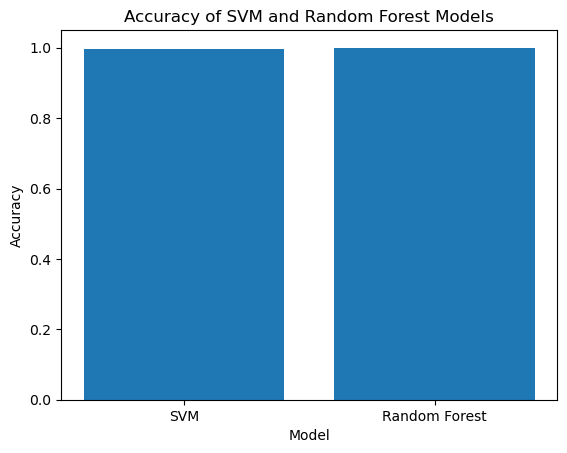

In [20]:
import matplotlib.pyplot as plt

# Create a bar chart of the accuracy of the two models
plt.bar(['SVM', 'Random Forest'], [0.9968102073365231, 1.0])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVM and Random Forest Models')
plt.show()